Imports Block

In [4]:
# -- IMPORTS START --
import pandas as pd
import glob
import re
import os
import sys
import pickle
import datetime
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.signal import butter, filtfilt, find_peaks
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn.model_selection import train_test_split
# -- IMPORTS END --

# enable zooming into graphs
%matplotlib notebook
plt.rcParams['figure.figsize'] = [9, 6] # width, height in inches

Acceleration Plots

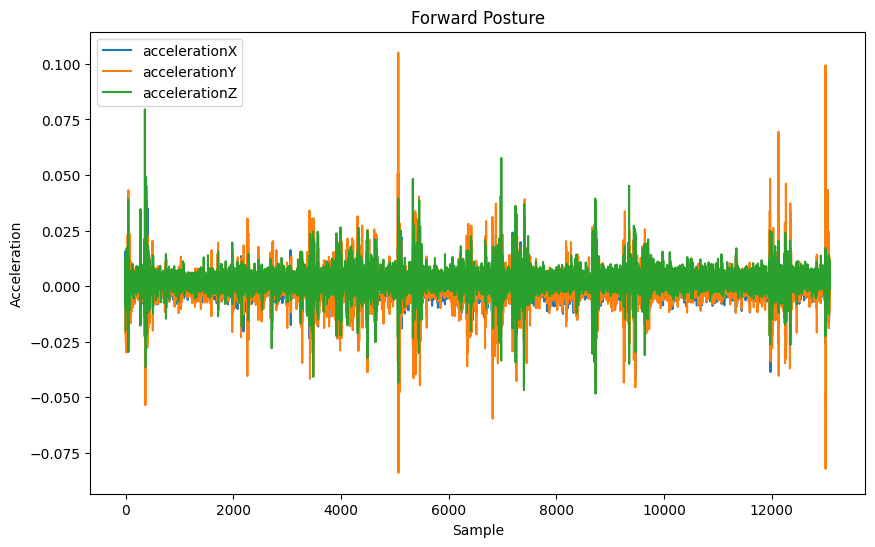

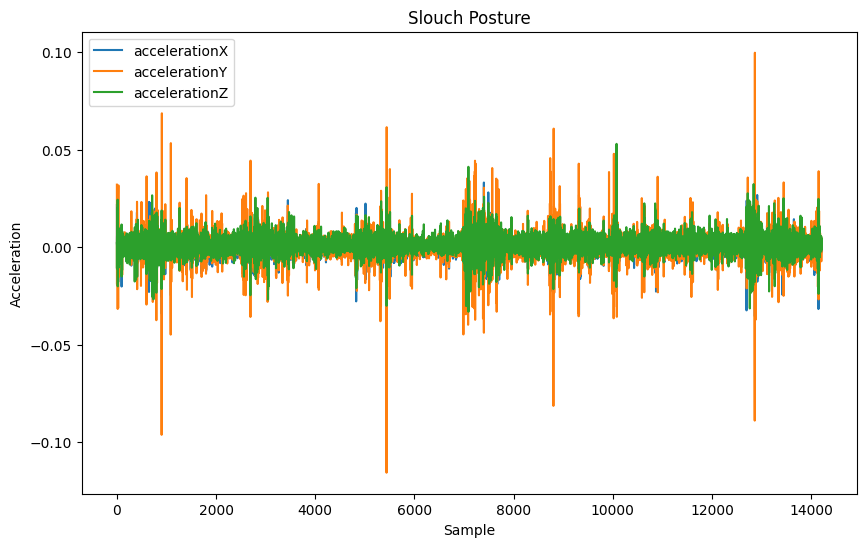

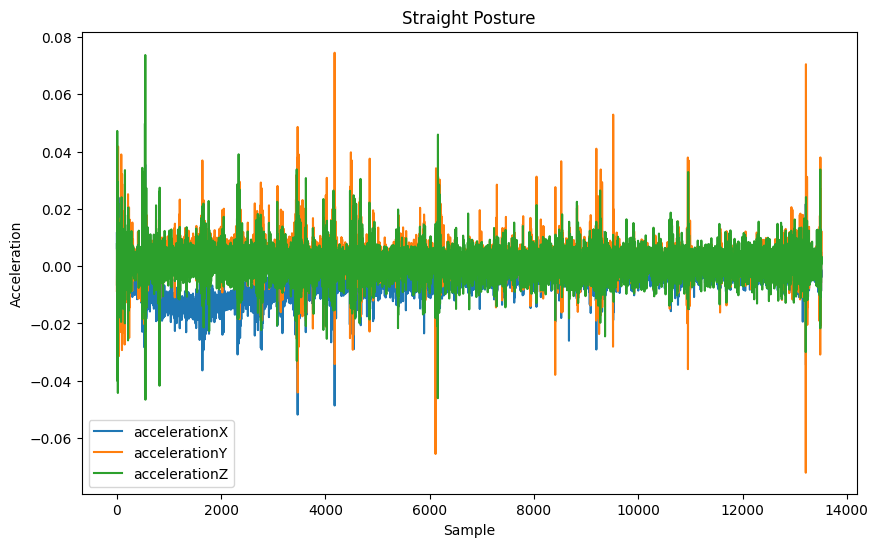

In [10]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots are displayed inline
%matplotlib inline

# Open the files
forward_data = pd.read_csv('Data/Forward/Arnav_forward5.csv')
slouch_data = pd.read_csv('Data/Slouch/Arnav_slouch1.csv')
straight_data = pd.read_csv('Data/Straight/Arnav_straight6.csv')

# Function to plot data
def plot_data(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['accelerationX'], label='accelerationX')
    plt.plot(data['accelerationY'], label='accelerationY')
    plt.plot(data['accelerationZ'], label='accelerationZ')
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Acceleration')
    plt.legend()
    plt.show()

# Draw plots for each file
plot_data(forward_data, 'Forward Posture')
plot_data(slouch_data, 'Slouch Posture')
plot_data(straight_data, 'Straight Posture')

Gyroscope, Rotation and Orientation plots

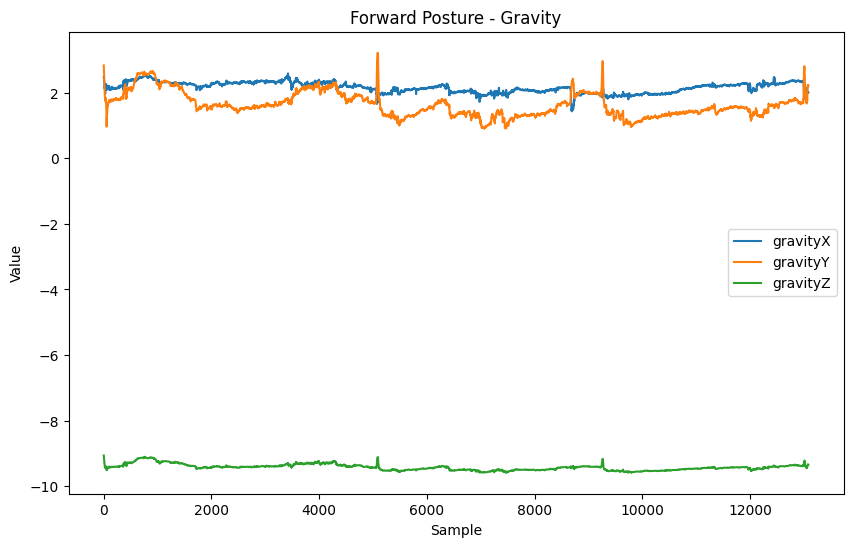

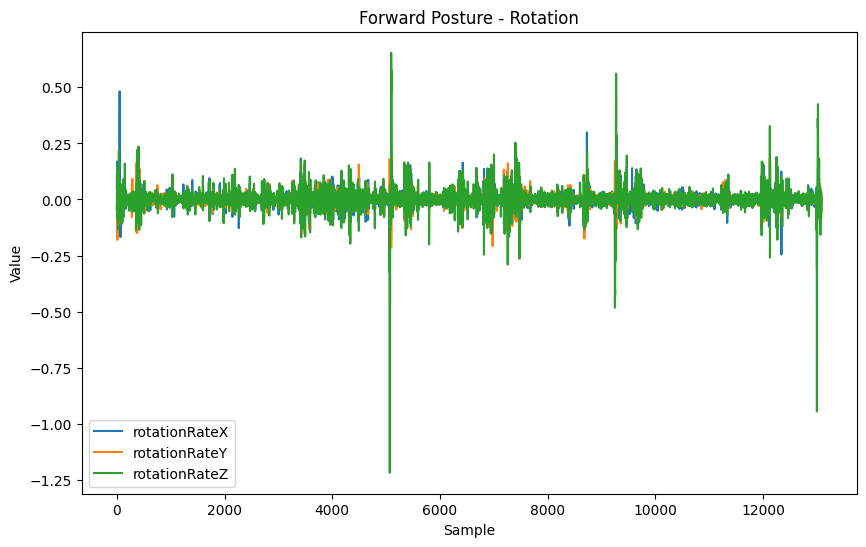

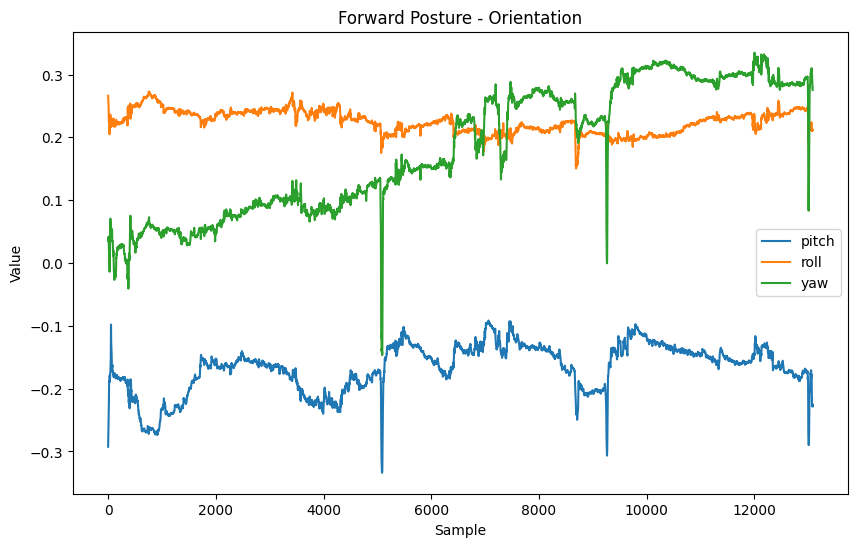

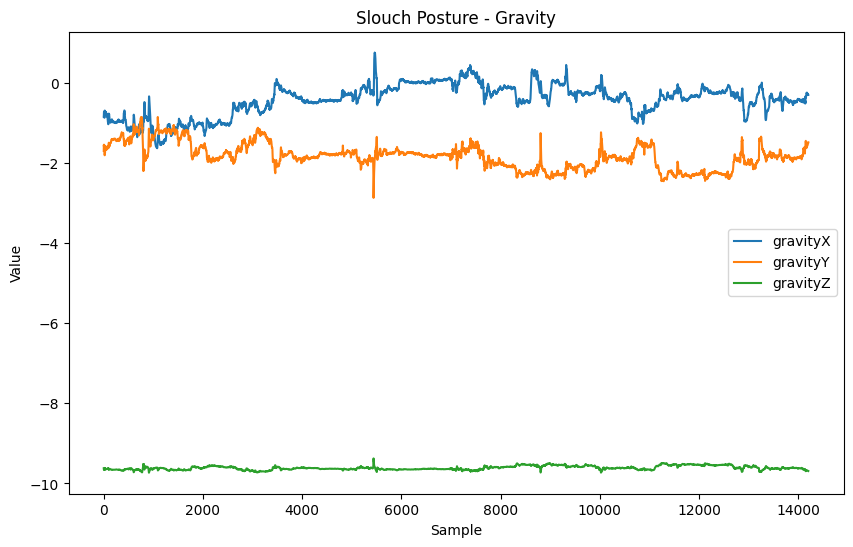

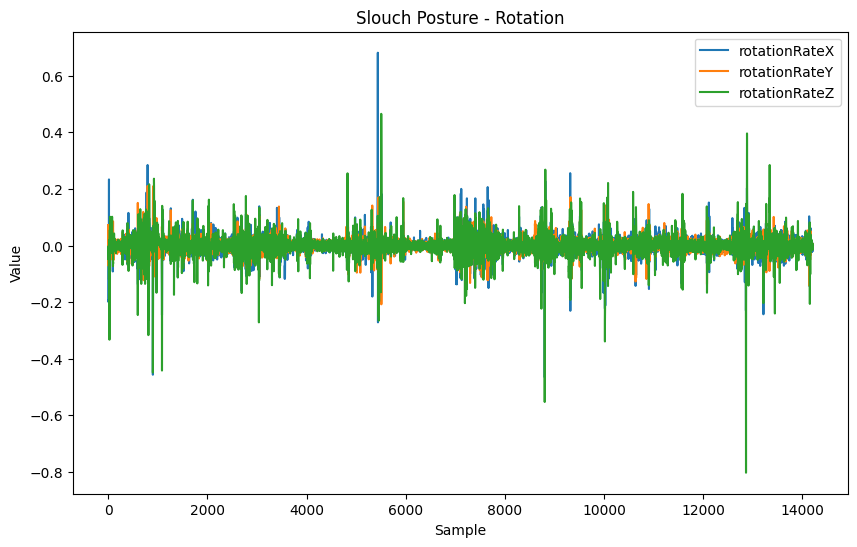

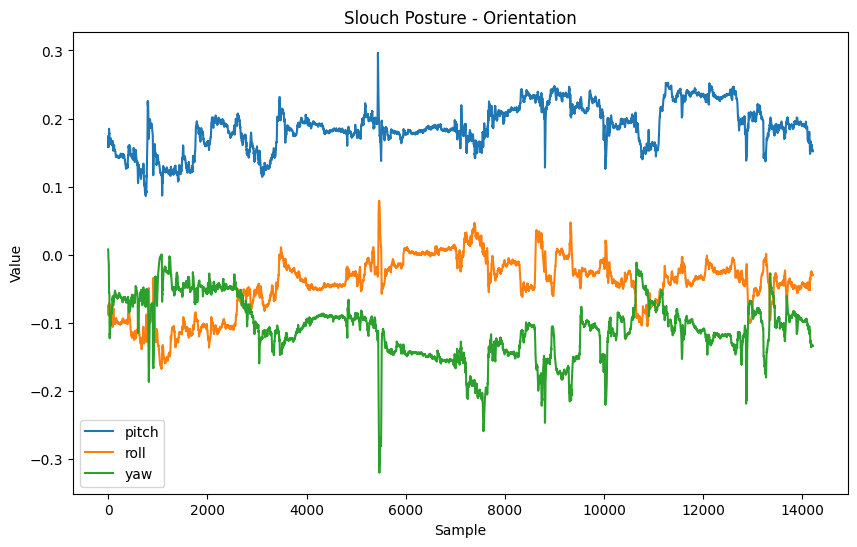

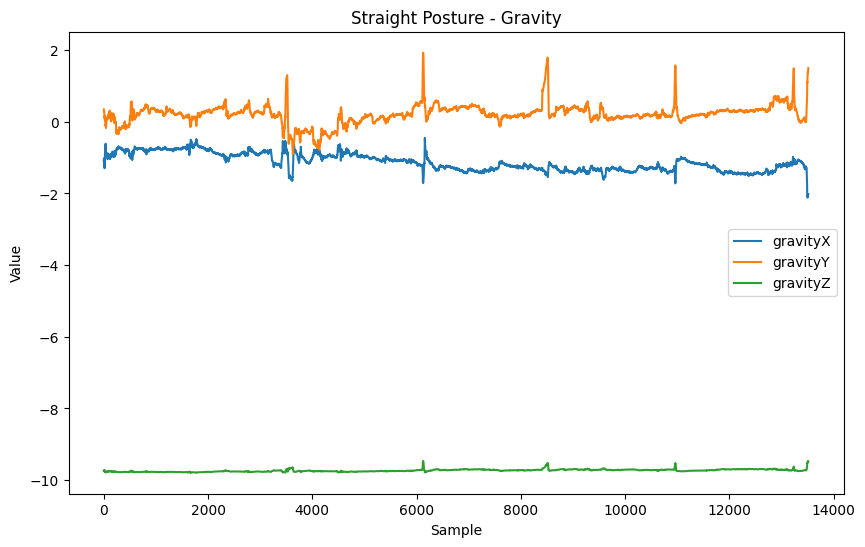

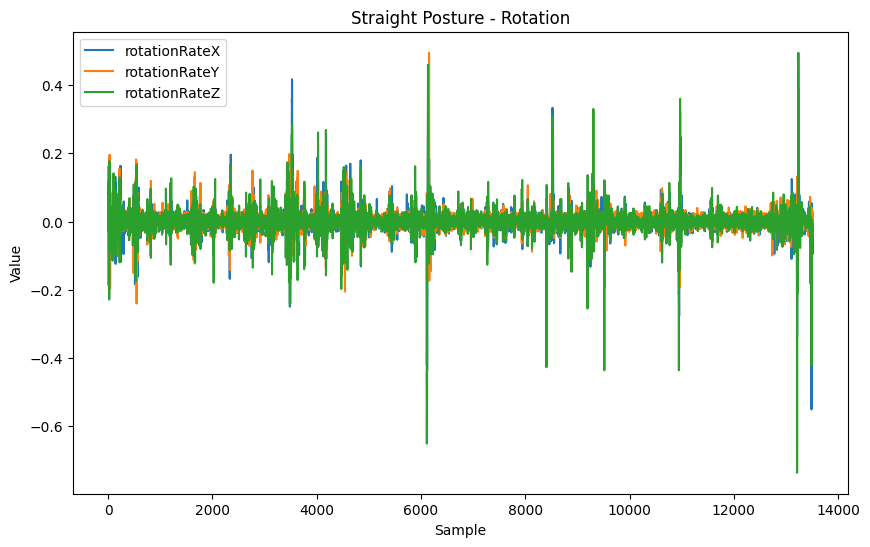

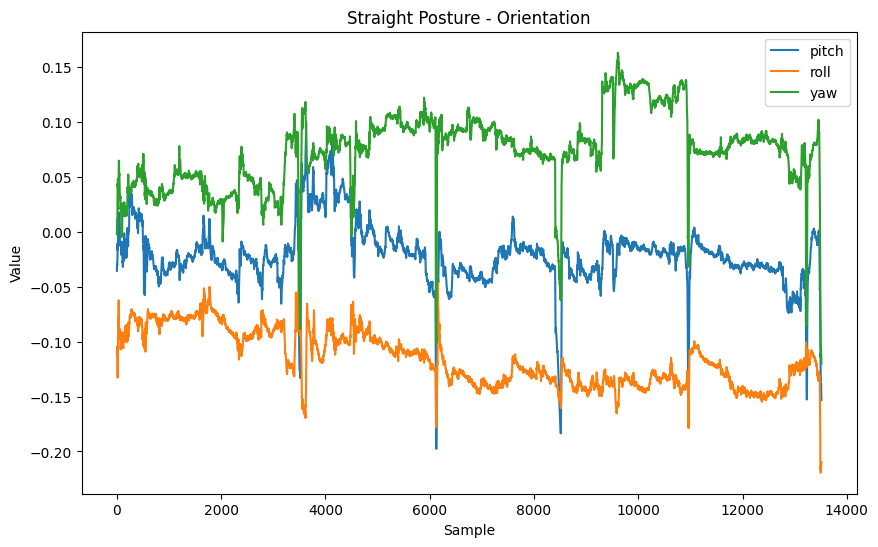

In [12]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

# Ensure plots are displayed inline
%matplotlib inline

# Open the files
forward_data = pd.read_csv('Data/Forward/Arnav_forward5.csv')
slouch_data = pd.read_csv('Data/Slouch/Arnav_slouch1.csv')
straight_data = pd.read_csv('Data/Straight/Arnav_straight6.csv')

# Function to plot data
def plot_data(data, columns, title):
    plt.figure(figsize=(10, 6))
    for column in columns:
        plt.plot(data[column], label=column)
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Draw plots for gravity, rotation, and orientation data
plot_data(forward_data, ['gravityX', 'gravityY', 'gravityZ'], 'Forward Posture - Gravity')
plot_data(forward_data, ['rotationRateX', 'rotationRateY', 'rotationRateZ'], 'Forward Posture - Rotation')
plot_data(forward_data, ['pitch', 'roll', 'yaw'], 'Forward Posture - Orientation')

plot_data(slouch_data, ['gravityX', 'gravityY', 'gravityZ'], 'Slouch Posture - Gravity')
plot_data(slouch_data, ['rotationRateX', 'rotationRateY', 'rotationRateZ'], 'Slouch Posture - Rotation')
plot_data(slouch_data, ['pitch', 'roll', 'yaw'], 'Slouch Posture - Orientation')

plot_data(straight_data, ['gravityX', 'gravityY', 'gravityZ'], 'Straight Posture - Gravity')
plot_data(straight_data, ['rotationRateX', 'rotationRateY', 'rotationRateZ'], 'Straight Posture - Rotation')
plot_data(straight_data, ['pitch', 'roll', 'yaw'], 'Straight Posture - Orientation')

In [28]:
import os
import glob
import pandas as pd

def transform_time_to_datetime(root):
    dateparse = lambda dates: [pd.to_datetime(d, unit='ns') for d in dates]
    # Get list of all activity folders
    activity_folders = os.listdir(root)
    # print(activity_folders)

    for folder in activity_folders:
        # print(folder)
        files = glob.glob(f"{root}/{folder}/*.csv")
        for filename in files:
            # print(filename)
            df = pd.read_csv(filename, parse_dates=['time'])
            df['time'] = pd.to_datetime(pd.to_numeric(df['time']), unit='ns')
            df.to_csv(filename, index=False)

# Call the function on all files in the Data folder
transform_time_to_datetime('Data')

Filteration

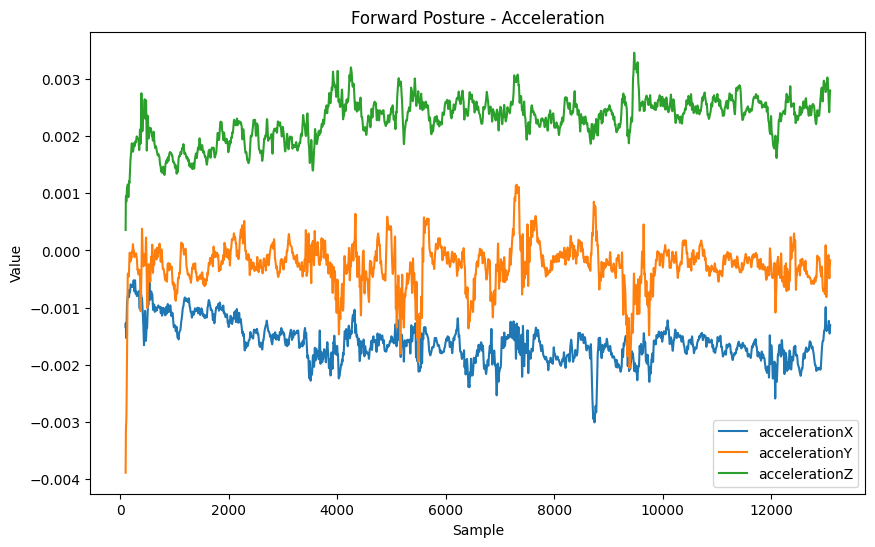

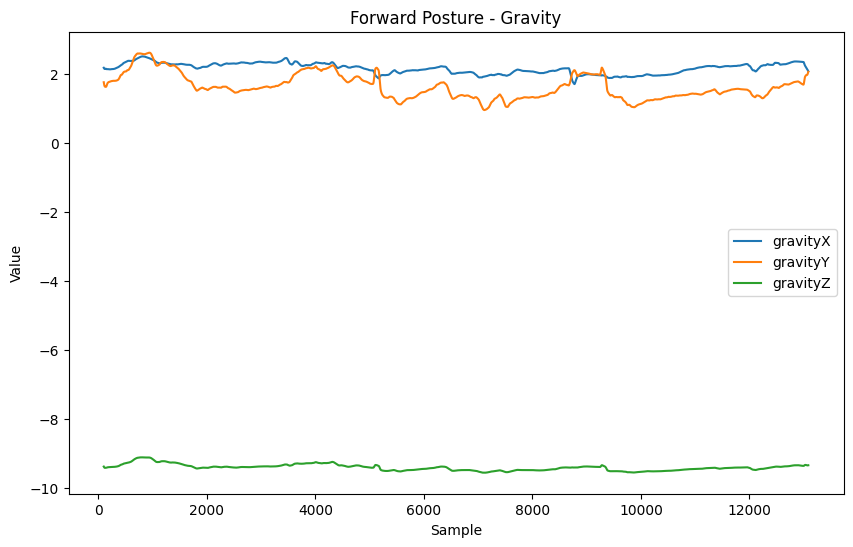

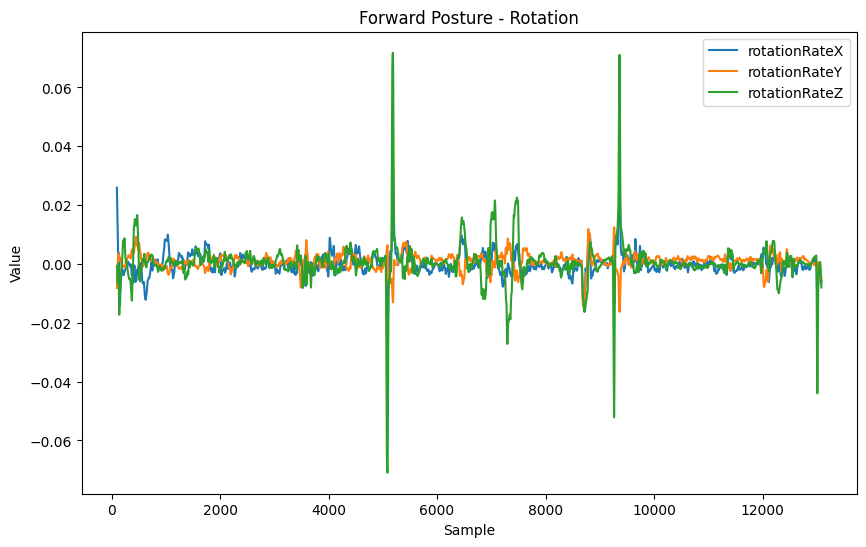

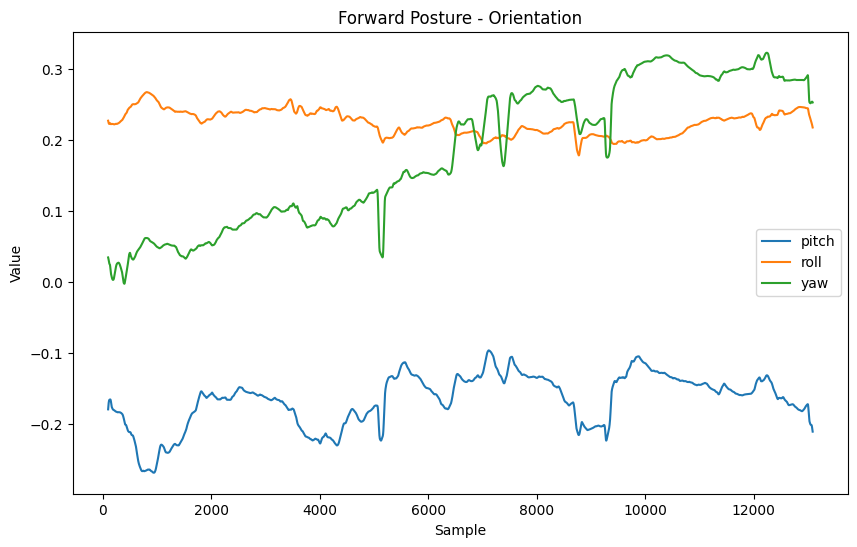

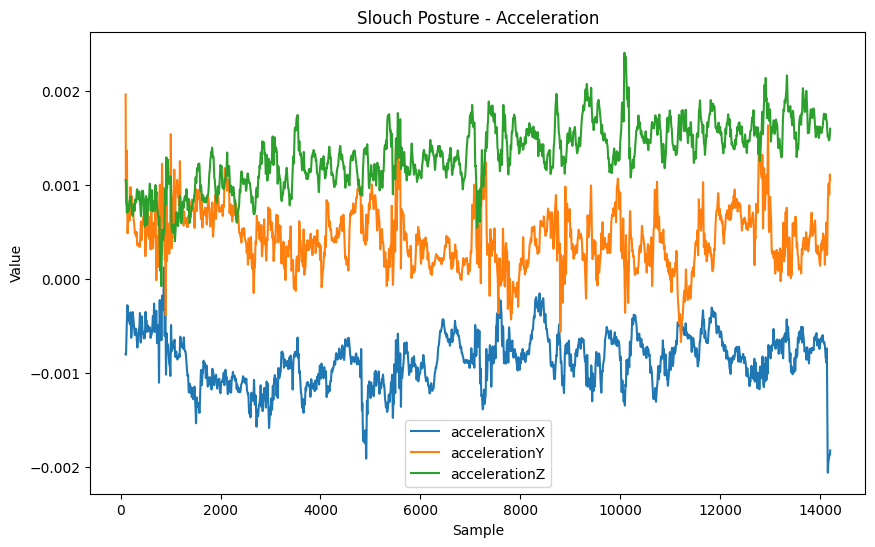

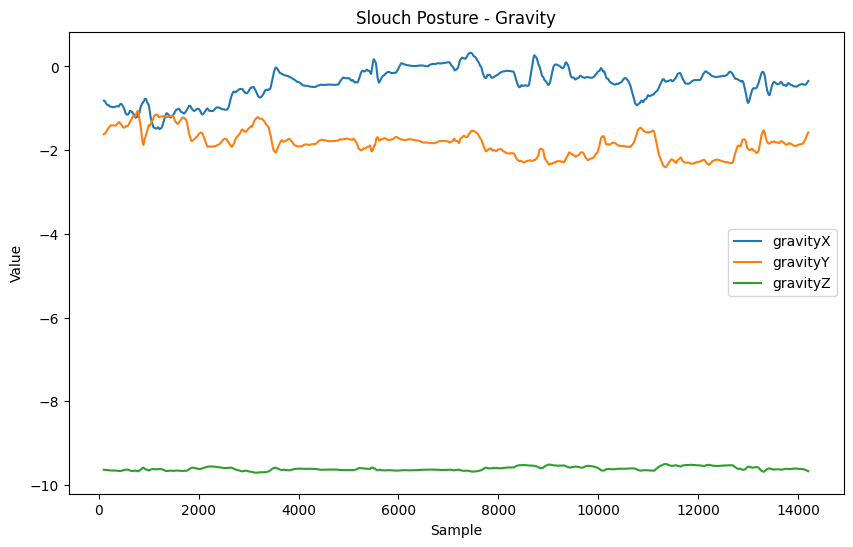

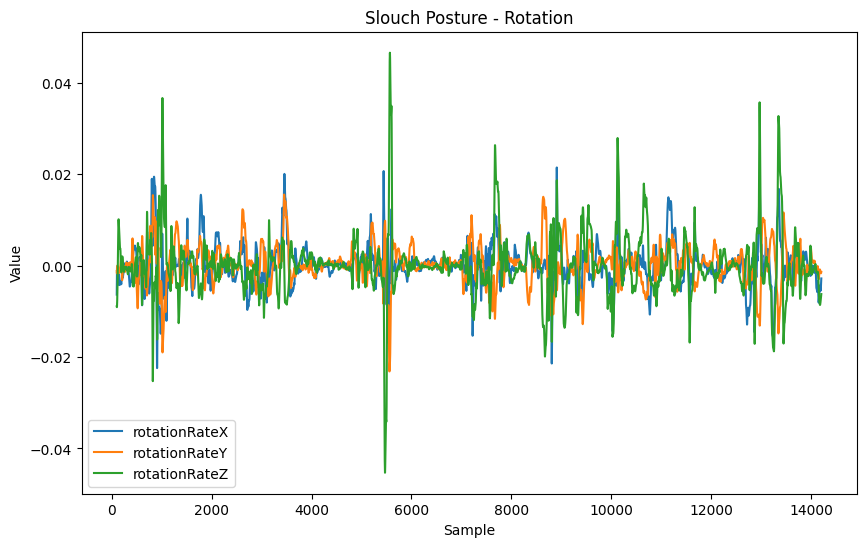

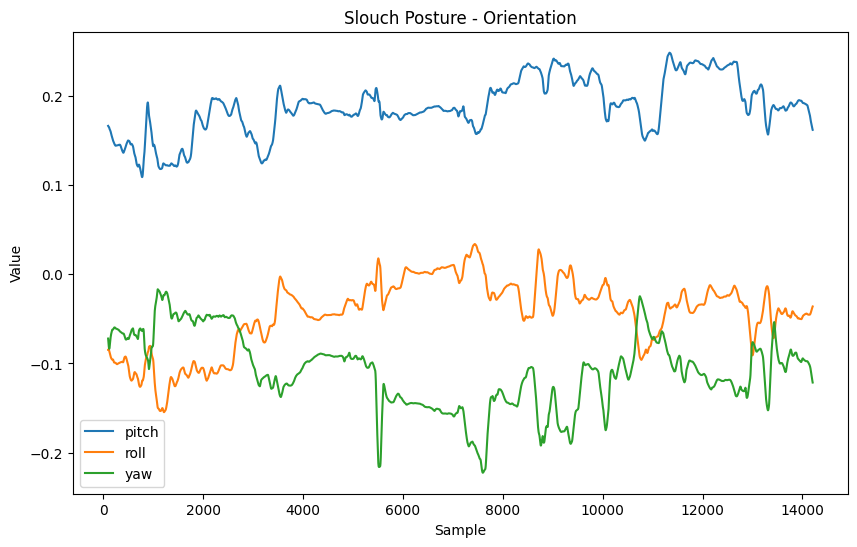

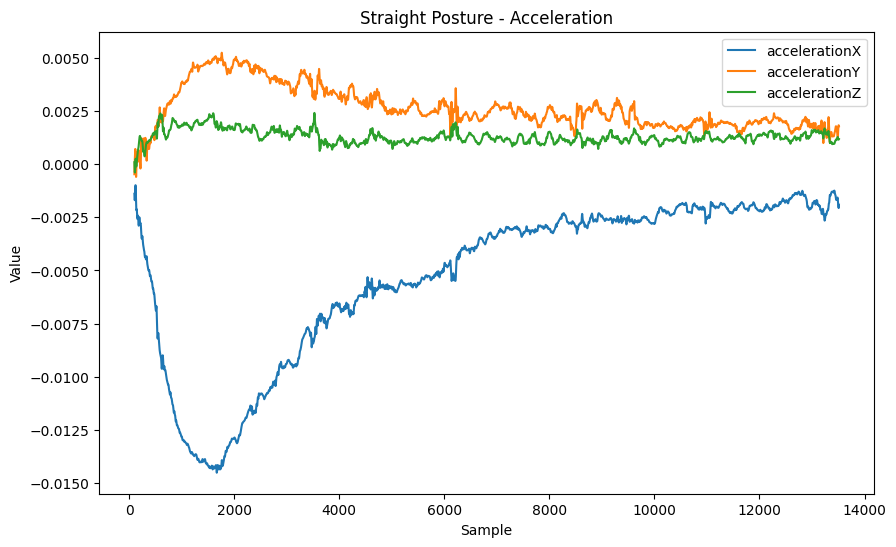

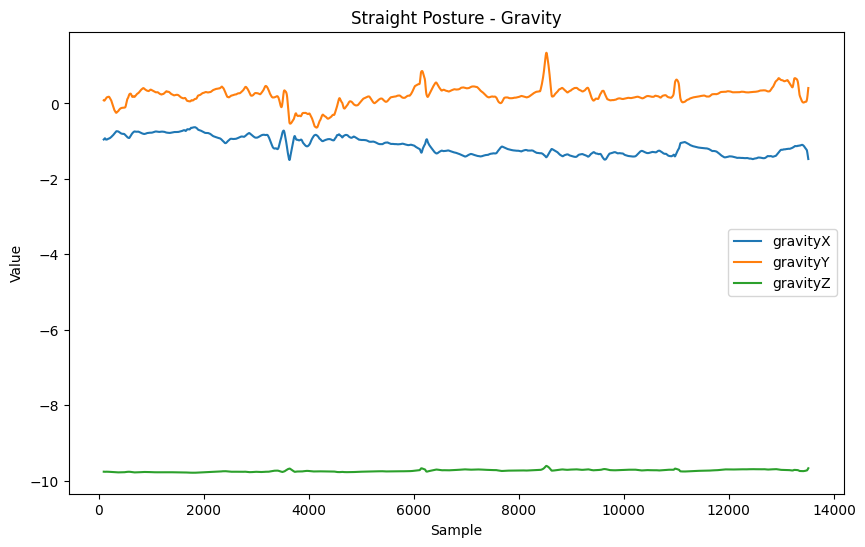

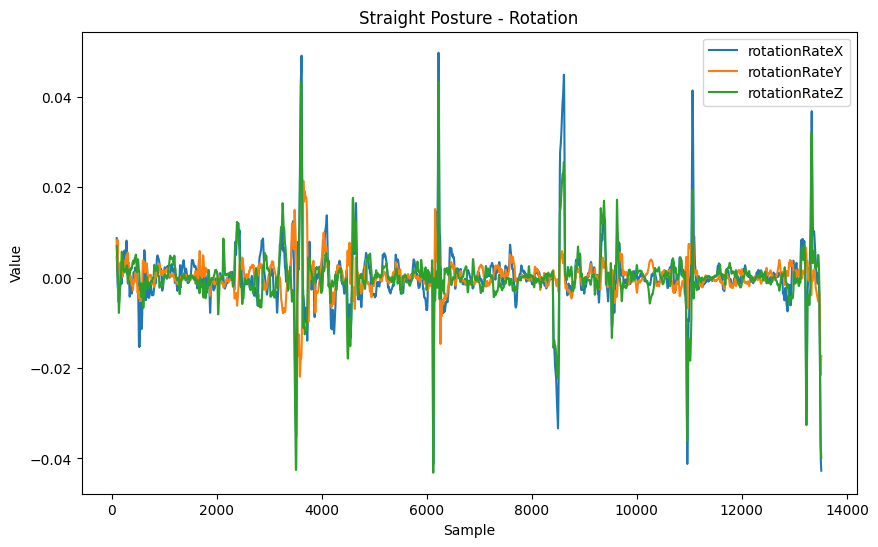

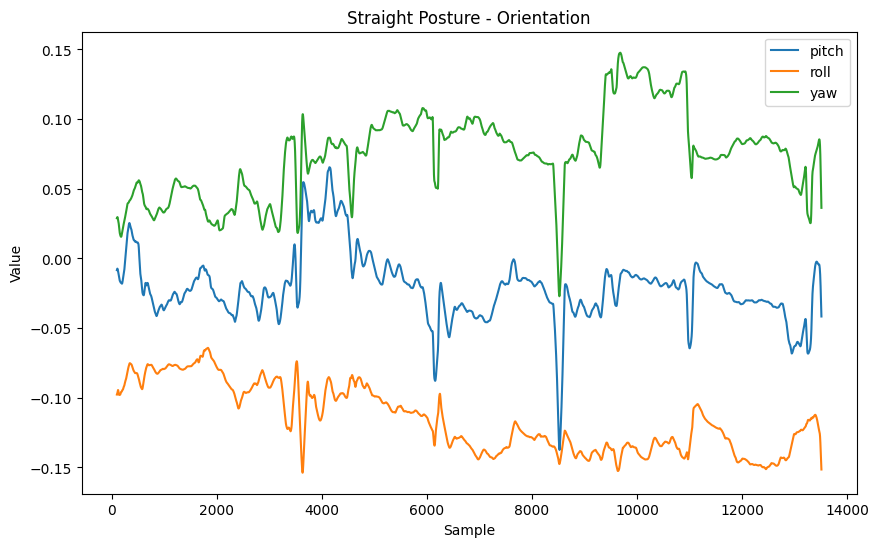

In [34]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Ensure plots are displayed inline
%matplotlib inline

# Define a function to apply a low-pass filter
def low_pass_filter(data, cutoff=5, fs=100, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

# Define a function to apply a moving average filter
def moving_average_filter(data, window_size=100):
    return data.rolling(window=window_size).mean()

# Define a function to remove the first and last 5 seconds of data
def trim_data(data, fs=100, seconds=5):
    samples_to_trim = fs * seconds
    return data.iloc[samples_to_trim:-samples_to_trim]

# Open the files
forward_data = pd.read_csv('Data/Forward/Arnav_forward5.csv')
slouch_data = pd.read_csv('Data/Slouch/Arnav_slouch1.csv')
straight_data = pd.read_csv('Data/Straight/Arnav_straight6.csv')

# Apply the filters and trim the data
for data in [forward_data, slouch_data, straight_data]:
    for column in ['accelerationX', 'accelerationY', 'accelerationZ', 'gravityX', 'gravityY', 'gravityZ', 'rotationRateX', 'rotationRateY', 'rotationRateZ', 'pitch', 'roll', 'yaw']:
        if column in data.columns:
            data[column] = low_pass_filter(data[column])
            data[column] = moving_average_filter(data[column])
    data = trim_data(data)

# Function to plot data
def plot_data(data, columns, title):
    plt.figure(figsize=(10, 6))
    for column in columns:
        plt.plot(data[column], label=column)
    plt.title(title)
    plt.xlabel('Sample')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Draw plots for acceleration, gravity, rotation, and orientation data
plot_data(forward_data, ['accelerationX', 'accelerationY', 'accelerationZ'], 'Forward Posture - Acceleration')
plot_data(forward_data, ['gravityX', 'gravityY', 'gravityZ'], 'Forward Posture - Gravity')
plot_data(forward_data, ['rotationRateX', 'rotationRateY', 'rotationRateZ'], 'Forward Posture - Rotation')
plot_data(forward_data, ['pitch', 'roll', 'yaw'], 'Forward Posture - Orientation')

plot_data(slouch_data, ['accelerationX', 'accelerationY', 'accelerationZ'], 'Slouch Posture - Acceleration')
plot_data(slouch_data, ['gravityX', 'gravityY', 'gravityZ'], 'Slouch Posture - Gravity')
plot_data(slouch_data, ['rotationRateX', 'rotationRateY', 'rotationRateZ'], 'Slouch Posture - Rotation')
plot_data(slouch_data, ['pitch', 'roll', 'yaw'], 'Slouch Posture - Orientation')

plot_data(straight_data, ['accelerationX', 'accelerationY', 'accelerationZ'], 'Straight Posture - Acceleration')
plot_data(straight_data, ['gravityX', 'gravityY', 'gravityZ'], 'Straight Posture - Gravity')
plot_data(straight_data, ['rotationRateX', 'rotationRateY', 'rotationRateZ'], 'Straight Posture - Rotation')
plot_data(straight_data, ['pitch', 'roll', 'yaw'], 'Straight Posture - Orientation')

In [7]:
import os
import glob
import pandas as pd
import numpy as np
from scipy.signal import butter, filtfilt

def low_pass_filter(data, cutoff=5, fs=100, order=4):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    filtered_data = filtfilt(b, a, data)
    return filtered_data

def moving_average_filter(data, window_size=20):
    return data.rolling(window=window_size).mean()

def trim_data(data, fs=100, seconds=5):
    samples_to_trim = fs * seconds
    return data.iloc[samples_to_trim:-samples_to_trim]

def calculate_magnitude(data, columns):
    return np.sqrt(np.sum(np.square(data[columns]), axis=1))

def add_features(window):
    features = pd.Series()
    
    features['acceleration_magnitude_mean'] = calculate_magnitude(window, ['accelerationX', 'accelerationY', 'accelerationZ']).mean()
    features['acceleration_magnitude_std'] = calculate_magnitude(window, ['accelerationX', 'accelerationY', 'accelerationZ']).std()
    
    for column in window.columns:
        if column != 'devicelocation' and column != 'time':
            features[f'{column}_mean'] = window[column].mean()
            features[f'{column}_std'] = window[column].std()
    
    return features

def extract_features(data, window_sec, sample_rate, activity):
    window_size = window_sec * sample_rate
    features_list = []
    
    for start in range(0, len(data) - window_size + 1, window_size):
        window = data.iloc[start:start + window_size]
        features = add_features(window)
        features['activity'] = activity
        features_list.append(features)
    
    features_df = pd.DataFrame(features_list)
    
    return features_df

def all_data_to_combined_csv(root, output_filename='all_data.csv', window_sec=60, sample_rate=25):
    all_data = pd.DataFrame()
    csv_files = glob.glob(os.path.join(root, '**', '*.csv'), recursive=True)

    for file in csv_files:
        data = pd.read_csv(file)
        
        for column in ['accelerationX', 'accelerationY', 'accelerationZ', 'gravityX', 'gravityY', 'gravityZ', 'rotationRateX', 'rotationRateY', 'rotationRateZ', 'pitch', 'roll', 'yaw']:
            if column in data.columns:
                data[column] = low_pass_filter(data[column])
                data[column] = moving_average_filter(data[column])
        data = trim_data(data)
        
        activity = os.path.basename(os.path.dirname(file))
        
        features = extract_features(data, window_sec, sample_rate, activity)
        all_data = pd.concat([all_data, features], ignore_index=True)

    all_data.to_csv(os.path.join(root, output_filename), index=False)
    print(f"Combined CSV file created at: {os.path.join(root, output_filename)}")

# Call the function to combine all data into a single CSV file
all_data_to_combined_csv('Data')

Combined CSV file created at: Data/all_data.csv


Accuracy: 0.9444444444444444
Confusion Matrix:
[[31  0  0]
 [ 1 27  4]
 [ 0  1 44]]
Classification Report:
              precision    recall  f1-score   support

     Forward       0.97      1.00      0.98        31
      Slouch       0.96      0.84      0.90        32
    Straight       0.92      0.98      0.95        45

    accuracy                           0.94       108
   macro avg       0.95      0.94      0.94       108
weighted avg       0.95      0.94      0.94       108



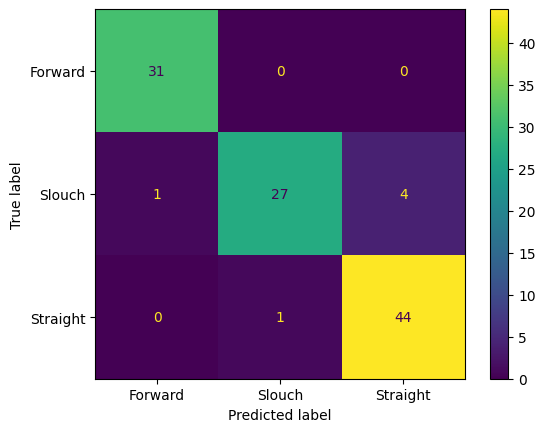

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('./Data/all_data.csv')

# Separate features and target
X = data.drop('activity', axis=1)
y = data['activity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create the decision tree classifier with criterion entropy
clf = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)

# Train the classifier
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=clf.classes_)
disp.plot()
plt.show()
